In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from FFNN import FFNN

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = [[1 if i == label else 0 for i in range(3)] for label in y]

# 70% training - 15% validation - 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
ffnn = FFNN(
    input_size=4,
    hidden_sizes=[5, 5],
    output_size=3,
    learning_rate=0.1,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax', 
    loss_function='mse',      
    reg_type='l1',
    reg_lambda=0.001,
    rms_norm=True    
)
ffnn.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=1, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn.predict(inputs)
    predicted_class = prediction.index(max(prediction))
    actual_class = target.index(max(target))
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|███████████████████████████████| 


Train Loss: 0.1877 - Val Loss: 0.0625


Epoch 2/20: 100%|███████████████████████████████| 


Train Loss: 0.1381 - Val Loss: 0.0495


Epoch 3/20: 100%|███████████████████████████████| 


Train Loss: 0.1127 - Val Loss: 0.0338


Epoch 4/20: 100%|███████████████████████████████| 


Train Loss: 0.0999 - Val Loss: 0.0279


Epoch 5/20: 100%|███████████████████████████████| 


Train Loss: 0.0961 - Val Loss: 0.0246


Epoch 6/20: 100%|███████████████████████████████| 


Train Loss: 0.0924 - Val Loss: 0.0269


Epoch 7/20: 100%|███████████████████████████████| 


Train Loss: 0.0800 - Val Loss: 0.0313


Epoch 8/20: 100%|███████████████████████████████| 


Train Loss: 0.0808 - Val Loss: 0.0405


Epoch 9/20: 100%|███████████████████████████████| 


Train Loss: 0.0891 - Val Loss: 0.0282


Epoch 10/20: 100%|██████████████████████████████| 


Train Loss: 0.0831 - Val Loss: 0.0262


Epoch 11/20: 100%|██████████████████████████████| 


Train Loss: 0.0729 - Val Loss: 0.0251


Epoch 12/20: 100%|██████████████████████████████| 


Train Loss: 0.0792 - Val Loss: 0.0313


Epoch 13/20: 100%|██████████████████████████████| 


Train Loss: 0.0845 - Val Loss: 0.0259


Epoch 14/20: 100%|██████████████████████████████| 


Train Loss: 0.0845 - Val Loss: 0.0271


Epoch 15/20: 100%|██████████████████████████████| 


Train Loss: 0.0808 - Val Loss: 0.0241


Epoch 16/20: 100%|██████████████████████████████| 


Train Loss: 0.0897 - Val Loss: 0.0248


Epoch 17/20: 100%|██████████████████████████████| 


Train Loss: 0.0750 - Val Loss: 0.0222


Epoch 18/20: 100%|██████████████████████████████| 


Train Loss: 0.0755 - Val Loss: 0.0216


Epoch 19/20: 100%|██████████████████████████████| 


Train Loss: 0.0853 - Val Loss: 0.0219


Epoch 20/20: 100%|██████████████████████████████| 

Train Loss: 0.0739 - Val Loss: 0.0217
Akurasi: 95.65%


In [12]:
ffnn.compare_lib(X_train, y_train, X_test, y_test)

Accuracy FFNN: 95.65%
Accuracy MLP Sklearn: 100.00%


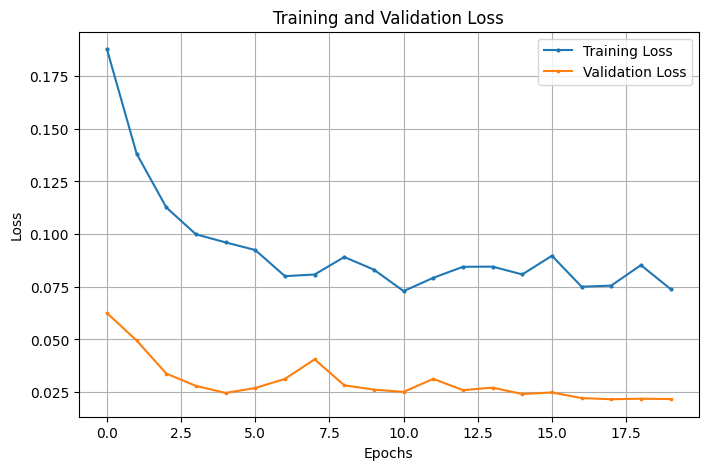

In [13]:
ffnn.plot_training_history()

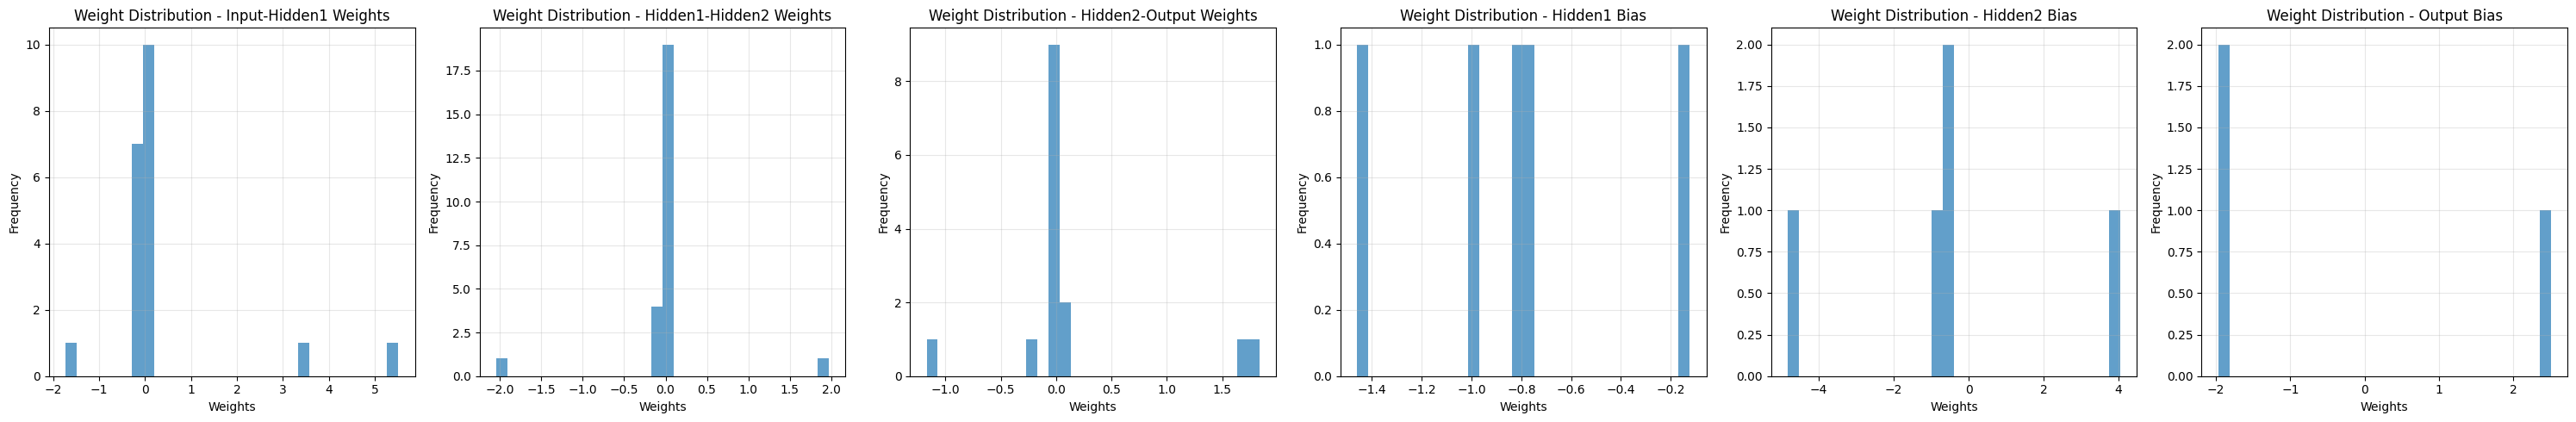

In [14]:
ffnn.plot_weight_distributions()

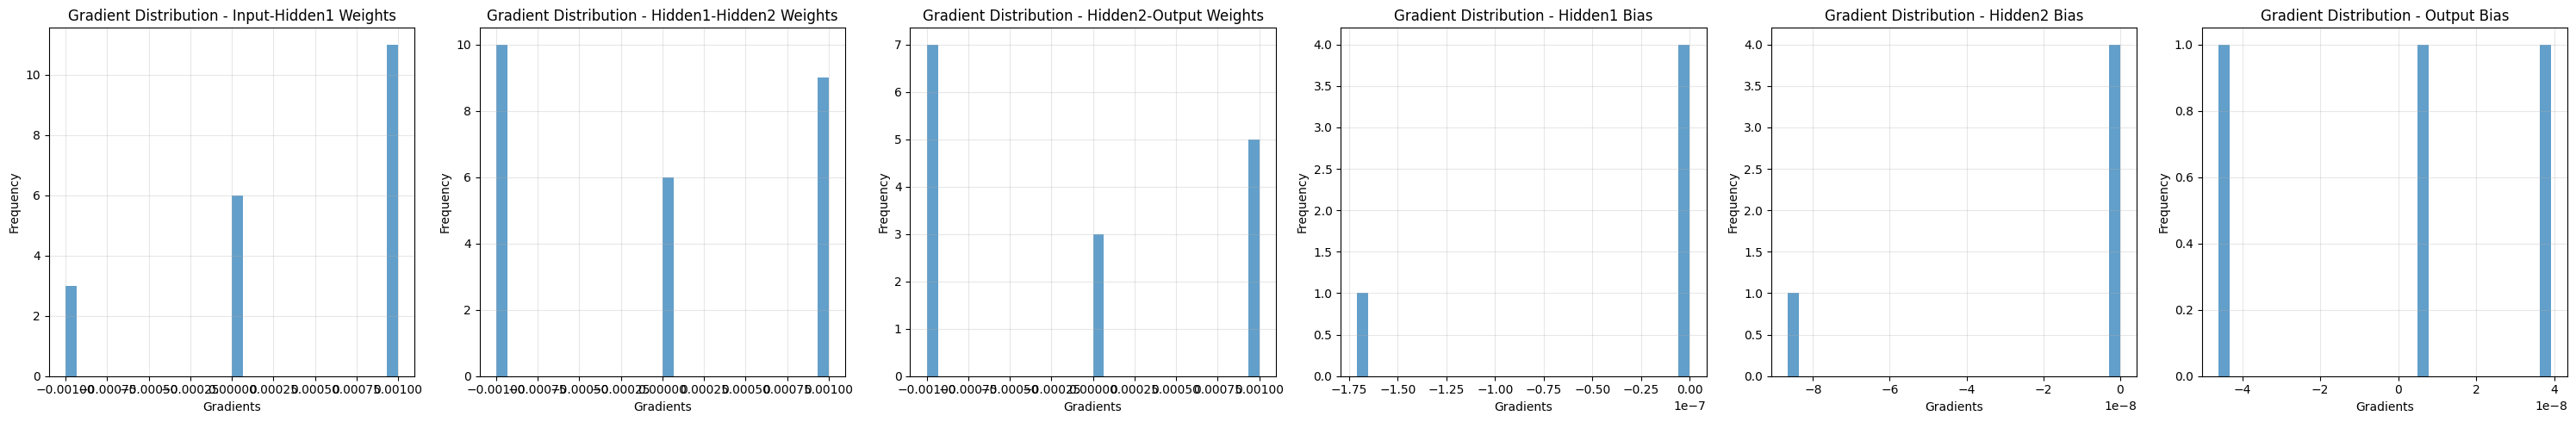

In [15]:
ffnn.plot_gradient_distributions()

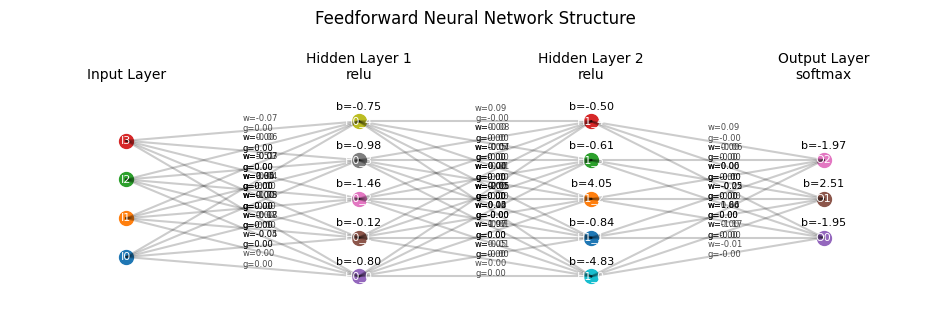

In [16]:
ffnn.visualize_network()